# On my way to linear regression

In this notebook, I show my path to linear regression. Before using a whole bunch of predefined functions from python libraries which will do a linear regression for me, I want to figure out what's under the hood and how it's working. So, first, I will start with a linear function and see how this can be plot in python.




## Linear function, part 1

As we all should know from school, the general formula for a linear function is 

\begin{equation} 
f(x) = m \cdot x + b
\end{equation}

where m is the slope and b the y-intercept. The following lines of code show how to program a linear function in python using the numpy library. You may experiment with the code but be aware this code is just a concept, not a complete program, so I decided to renounce error checking.

<function matplotlib.pyplot.show(close=None, block=None)>

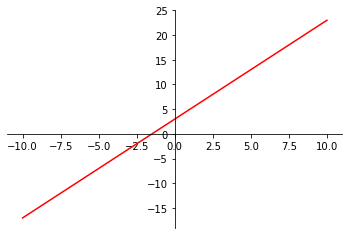

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 10 linearly spaced numbers in th einterval of [-10,10]
x=np.linspace(-10,10,10)

# y intercept
b = 3
# slope
m = 2
# declaration of function f(x) which is y=mx+b here
y = m*x + b

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y,'red')
plt.show

## Linear function, part 2

In the first example, we set the slope and y-intercept by manipulating values in the code. But, what is to do if we do not have a slope or the y-intercept so far but only 2 coordinates (x1, y1) and (x2, y2)? We must calculate the missing values ourself. To calculate a slope, you simply divide y by x. Since we have two values to take into consideration, we have to calculate the delta between the y and x values:

\begin{equation}
slope = m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} 
\end{equation}

Example: Let P1 = (-3,-2) and P2 = (5,4). Put in the equation above we get

\begin{equation}
slope = m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} = \frac{4 - (-2)}{5 - (-3)} = \frac{6}{8} = \frac{3}{4}
\end{equation}

Finding the y-intercept, given the slope and one point is no problem anymore

\begin{equation}
y = m \cdot x + b \Leftrightarrow 
y - m \cdot x = b
\end{equation}

Putting P2 = (5,4) in the equation above we get

\begin{equation}
4 - \frac{3}{4} \cdot 5 = b \leftrightarrow
4 - \frac{15}{4} = 4 - 3\frac{3}{4} = \frac{1}{4} = b
\end{equation}

So the y-intercept is 1/4. Put the values for b and m in the source code. A scatter plot has been added as overlay above the line plot. As you can see, both points are on the line.

<function matplotlib.pyplot.show(close=None, block=None)>

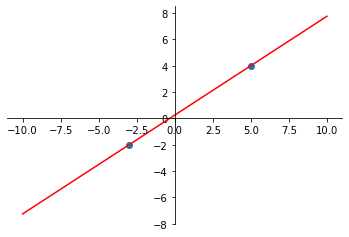

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 10 linearly spaced numbers in th einterval of [-10,10]
x=np.linspace(-10,10,10)

# y intercept
b = 0.25
# slope
m = 0.75
# declaration of function f(x) which is y=mx+b here
y = m*x + b

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#
# begin
# this is the part for drawing the two points as scatter polot
#

# put p1 and p2 in a list
# put the x values
scatter_x = [-3, 5]
# put the y values
scatter_y = [-2, 4]
plt.scatter(scatter_x,scatter_y)

#
# end
# this is the part for drawing the two points as scatter polot
#

plt.plot(x,y,'red')
plt.show


## Linear function, part 3

If only two points are given, it is always possible to draw a straight line by these two points.If there are more than two points, it is no longer possible to assume that all points are on the calculated straight line. In this case, it is necessary to make a compensation calculation to determine the best straight line for the point cloud. A typical and also easy-to-understand method of balancing calculation is the method of the smallest squares.

 Here, the unknowns (parameters) of the model are determined in such a way that the square sum of the measurement deviations of all observations is minimized and thus the measurement curve and theory curve correspond best.
This is an optimization process. The calculation steps of a balancing process are simplified if the observations are considered to be normally distributed, equal and uncorrelated. The stochastic properties of the observations in the regression analysis are examined.

Let's repeat the equation for linear equations

\begin{equation} 
f(x) = y = m \cdot x + b
\end{equation}

and find a more general formula:

\begin{equation} 
y = \beta_0 + \beta_1 \cdot x
\end{equation}

where m and b are redefined by 

\begin{equation} 
b = \beta_0 
\end{equation}
\begin{equation} 
m = \beta_1
\end{equation}

The formula for the slope's calculation via the smallest squares is

\begin{equation} 
\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) \cdot (y_i – \bar{y})}{\sum_{i=1}^n (x_i – \bar{x})^2}
\end{equation}

where $\bar{x}$ is the mean of the x-values and $\bar{y}$ is the mean of the y-values. $\beta_0$ can be calculated as

\begin{equation}
\beta_0 = \bar{y} – \beta_1\cdot \bar{x}
\end{equation}

Time to get our hands dirty...



## One ring to rule them all

We want to give our girlfriend a ring for Christmas, but we don't know her ring size. Now it would be doofy to ask her about the ring size, so the whole surprise would be gone. Therefore we would like to appreciate the ring size (y) of our girlfriend. But we only know their height (x). To estimate the ring size, we collect 10 data points from friends and acquaintances, and record their height and ring size:

<table>
<tbody>
<tr>
<th>Person \(i\)</th>
<th>1</th>
<th>2</th>
<th>3</th>
<th>4</th>
<th>5</th>
<th>6</th>
<th>7</th>
<th>8</th>
<th>9</th>
<th>10</th>
</tr>
<tr>
<th>Height \(x\)</th>
<td>156.3</td>
<td>158.9</td>
<td>160.8</td>
<td>179.6</td>
<td>156.6</td>
<td>165.1</td>
<td>165.9</td>
<td>156.7</td>
<td>167.8</td>
<td>160.8</td>
</tr>
<tr>
<th>Ring size \(y\)</th>
<td>47.1</td>
<td>46.8</td>
<td>49.3</td>
<td>53.2</td>
<td>47.7</td>
<td>49.0</td>
<td>50.6</td>
<td>47.1</td>
<td>51.7</td>
<td>47.8</td>
</tr>
</tbody>
</table>

We call y the target size here, because their prediction is our goal. The height x is commonly called influence size. However, there are countless other names for the two types of variables. In other sources, y is also often called target variable, regressing edge, outcome, explained variable, or dependent variable (because it depends on x). Other names for x are covariable, input, regressor, explanatory variable, or independent variable.

Wait... regressing edge? Regressor? Hmmm....
Sounds like we are building a linear regression model

2.8406810945004963


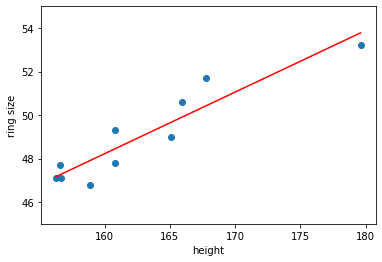

In [15]:
import matplotlib.pyplot as plt 
import numpy as np

x = [156.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8] 
y = [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]

x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)


# let's call the values (xi - x) x_opt
# let's call the values (yi - y) y_opt

x_opt = []
y_opt = []

# calculate a list with (xi -x)
for x_item in x:
    x_opt.append(x_item-x_mean)

# calculate a list with (yi -y)
for y_item in y:
    y_opt.append(y_item-y_mean)

# multiply each element from two lists    
denominator = sum(x * y for x, y in zip(x_opt, x_opt))      
numerator = sum(x * y for x, y in zip(x_opt, y_opt))

# calculate the slope
m = numerator / denominator
# calculate the y-intercept
b = y_mean - m*x_mean
    
print(b)

# draw a scatter plot with the tupels     
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.set_ylabel('ring size')
ax.set_xlabel('height')
ax.set_ylim(45,55)
plt.scatter(x, y) 

# draw the regression line
x_line = [min(x), max(x)]
y_line = [b + m*min(x), b + m*max(x)]
plt.plot(x_line,y_line,'red')

# show the plot
plt.show()

## Prediction in simple linear regression

So far, we have learned how to calculate the two coefficients a and b. Now we want to use the parameters to predict for new data x what value we expect for y.

The goal we want to achieve with regression is this: Suppose a new person comes, of which we only know the height x=170. What then is the expected value of the ring size y? So we are looking for E(y|x), the conditional expected value of y, given one knows x.

In simple linear regression, there is only one influence x. The regression line is therefore

\begin{equation}
y = \beta_0 + \beta_1 \cdot x
\end{equation}

So to get a prediction for target size y, we simply need to insert the corresponding value for x into the equation. We have already calculated the values for $\beta_0$ and $\beta_1$ beforehand.

For example, in the shown code, we determined the values $\beta_1=2.8457$ and $\beta_0=0.2836$. What ring size can be expected of your girlfriend if she has a height of x=170cm? For this we calculate:

\begin{equation}
y = \beta_0 + \beta_1 \cdot x = 2.8457 + 0.2836 \cdot 170 = 51.0577
\end{equation}

A ring with a size 51 should therefore fit well with her.

It is still important to mention here that we only predict the expected value of y. So the ring size will not be exactly 51.06, but there is always a small error, which is called in the linear model ε (read: Epsilon). In reality, the regression equation is

\begin{equation}
y = \beta_0 + \beta_1 \cdot x + \epsilon
\end{equation}